데이터 분석을 위한 전처리와 시각화 with 파이썬 p469

In [3]:
#kon
# !pip install konlpy
# !pip show konlpy

In [4]:
#형태소 토큰화 하기 

from konlpy.tag import Okt
okt=Okt()

Okt 클래스 메소드 
- phrases() : 어구 추출 
- morphs() : 형태소 추출
- nouns(text) : 명사 추출 
- pos(text) : 품사 정보 추가하여 추출 

In [5]:
#morphs()

from konlpy.tag import Okt
okt=Okt()
token = okt.morphs('i like you')
token

['i', 'like', 'you']

In [6]:
#pos()

from konlpy.tag import Okt
okt=Okt()
sentence_tag = okt.pos('하늘이 참 이쁘다고')
print(sentence_tag)
sentence_tag = okt.pos('하늘이 참 이쁘다고', join=True)
print(sentence_tag)



[('하늘', 'Noun'), ('이', 'Josa'), ('참', 'Verb'), ('이쁘다고', 'Adjective')]
['하늘/Noun', '이/Josa', '참/Verb', '이쁘다고/Adjective']


In [7]:
#phrases()

from konlpy.tag import Okt
okt=Okt()
sentence = okt.phrases('하늘이 참 이쁘다고')
print(sentence)


['하늘']


형태소 분석

In [8]:
# #pos()로 형태소 분석 

# from konlpy.tag import Okt
# okt=Okt()
# text = input()
# sentence_tag = okt.pos(text)
# sentence_tag

In [9]:
#collection 
#counter() : 동일한 값의 빈도수 
#most_common(n) : 가장 빈도수가 많은 순서대로 n개 추출 

import collections

text = '눈물이 차올라서 고갤 들어 흐르지 못하게 또 살짝 웃어\
    내게 왜 이러는지 무슨 말을 하는지 오늘 했던 모든 말 저 하늘 위로\
    한번도 못했던 말 울면서 할 줄은 나 몰랐던 말\
    나는요 오빠가 좋은 걸 (휴) 어떡해\
    이런 나를 보고 그런 슬픈 말은 하지 말아요 (하지 말아요)\
    철없는 건지 조금 둔한 건지 믿을 수가 없는걸요\
    눈물은 나오는데 활짝 웃어 네 앞을 막고서 막 크게 웃어\
    내가 왜 이러는지 부끄럼도 없는지\
    자존심은 곱게 접어 하늘위로 한 번도 못했던 말 어쩌면 다신 못할 바로 그 말\
    나는요 오빠가 좋은 걸 (아이쿠, 하나 둘)'
sentence_tag =okt.pos(text)

adj_list = []
for word, tag in sentence_tag:
    if tag in ['Noun','Adjective']: #품사중 명사, 형용사만 추출 
        adj_list.append(word)
counts = collections.Counter(adj_list)
tag = counts.most_common(10)
print(tag)


[('말', 7), ('눈물', 2), ('왜', 2), ('하늘', 2), ('위로', 2), ('오빠', 2), ('좋은', 2), ('걸', 2), ('고', 1), ('또', 1)]


워드 클라우드 

In [10]:
#워드클라우드 설치 

# !pip install wordcloud

In [11]:
import matplotlib.pyplot as plt 

In [12]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud


In [27]:
#한글 글꼴 설치 
%matplotlib inline  
import koreanize_matplotlib

import matplotlib as mpl  # 기본 설정 
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

font_path = '../../data/NanumGothic.ttf'






In [14]:
#텍스트 가져와서 품사 태깅 

text = '눈물이 차올라서 고갤 들어 흐르지 못하게 또 살짝 웃어\
    내게 왜 이러는지 무슨 말을 하는지 오늘 했던 모든 말 저 하늘 위로\
    한번도 못했던 말 울면서 할 줄은 나 몰랐던 말\
    나는요 오빠가 좋은 걸 (휴) 어떡해\
    이런 나를 보고 그런 슬픈 말은 하지 말아요 (하지 말아요)\
    철없는 건지 조금 둔한 건지 믿을 수가 없는걸요\
    눈물은 나오는데 활짝 웃어 네 앞을 막고서 막 크게 웃어\
    내가 왜 이러는지 부끄럼도 없는지\
    자존심은 곱게 접어 하늘위로 한 번도 못했던 말 어쩌면 다신 못할 바로 그 말\
    나는요 오빠가 좋은 걸 (아이쿠, 하나 둘)'
    
sentence_tag =okt.pos(text)

adj_list = []
for word, tag in sentence_tag:
    if tag in ['Noun','Adjective']:
        adj_list.append(word)

In [21]:
#동일한 단어의 빈도수 구하기 

counts = collections.Counter(adj_list)
tag = counts.most_common(10)
tag

[('말', 7),
 ('눈물', 2),
 ('왜', 2),
 ('하늘', 2),
 ('위로', 2),
 ('오빠', 2),
 ('좋은', 2),
 ('걸', 2),
 ('고', 1),
 ('또', 1)]

In [28]:
#워드 클라우드 생성 

from wordcloud import WordCloud

wc = WordCloud(font_path=font_path, background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

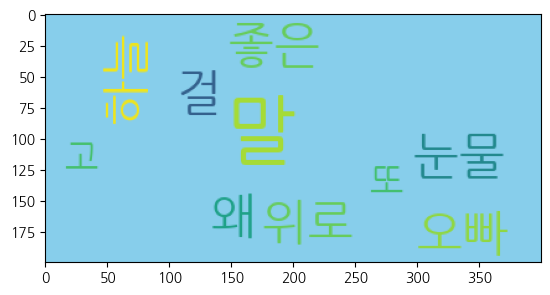

In [29]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(10,8))
plt.imshow(cloud)